In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import re

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

# READ DATA

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/dataset_penyisihan_bdc_2024.xlsx')
data.head()

,text,label
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik


# VISUALIZATION

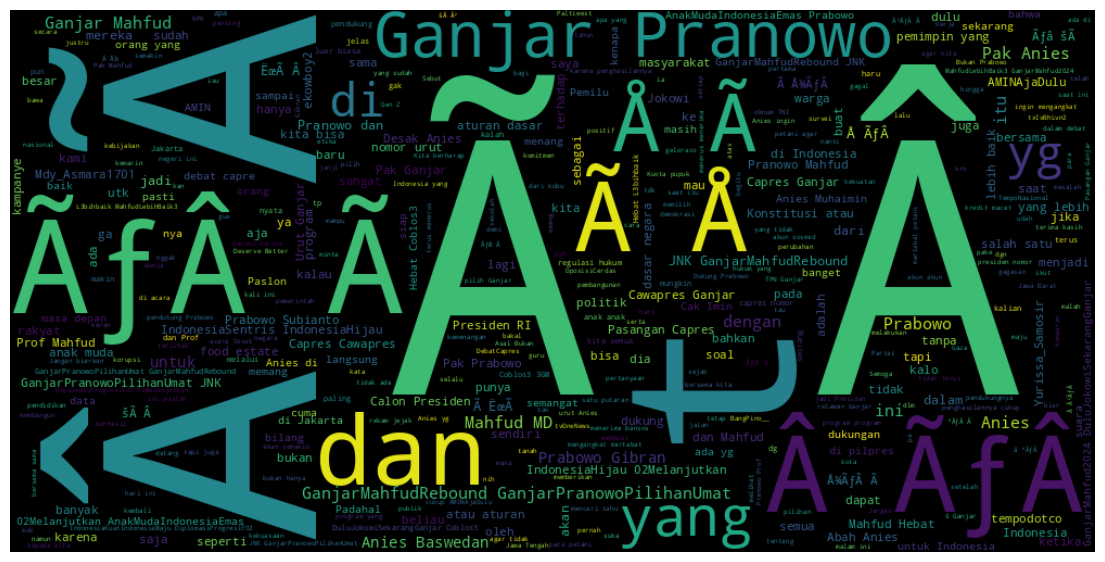

In [ ]:
df = ' '.join(data['text'].tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT','RE', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color='black',
               max_words=400, width=1000, height=500)
wc.generate(df)

plt.figure(figsize=(14,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
data.shape

(5000, 7)

In [ ]:
data['label'].value_counts()

label
Politik                    2972
Sosial Budaya               587
Pertahanan dan Keamanan     400
Ideologi                    400
Ekonomi                     367
Sumber Daya Alam            192
Demografi                    62
Geografi                     20
Name: count, dtype: int64

In [ ]:
politik_count = data[data['label'] == 'Politik']['label'].count()

mean_downsampling = round((data.shape[0] - politik_count)/7)
mean_downsampling

290

In [ ]:
mean_downsampling/0.2

1450.0

In [ ]:
politik_data = data[data['label'] == 'Politik']

# Sample 1450 entries from the 'Politik' data
politik_downsampled = politik_data.sample(n=1450, random_state=42)  # random_state for reproducibility

# Filter the non-'Politik' entries
non_politik_data = data[data['label'] != 'Politik']

# Concatenate the downsampled 'Politik' data with the rest of the data
balanced_data = pd.concat([politik_downsampled, non_politik_data])

# Shuffle the dataset if necessary
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
balanced_data['label'].value_counts()

label
Politik                    1450
Sosial Budaya               587
Pertahanan dan Keamanan     400
Ideologi                    400
Ekonomi                     367
Sumber Daya Alam            192
Demografi                    62
Geografi                     20
Name: count, dtype: int64

# PREPROCESSING

## 1. CLEANING

In [ ]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\b[A-Za-z0-9_]{10,}\b', '', text)
  text = re.sub(r'\s+', ' ', text).strip()
  text = re.sub(r'\d+', '', text)

  return text

balanced_data['cleasing'] = balanced_data['text'].apply(clean_twitter_text)

In [ ]:
balanced_data.head()

,text,label,cleasing,case_folding,normalize,tokenize,clean_text
0,"RT Momen capres nomor urut 3, Ganjar Pranowo b...",Pertahanan dan Keamanan,Momen capres nomor urut Ganjar Pranowo besuk ...,momen capres nomor urut ganjar pranowo besuk ...,momen capres nomor urut ganjar pranowo besuk ...,"[momen, capres, nomor, urut, ganjar, pranowo, ...","[momen, capres, nomor, urut, besuk, korban, ok..."
1,RT @0SIRtH1oGVbK2EuKBmDu8IZTnnsgBYm4kuRvLEJJ8l...,Politik,Sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,"[sewaktu, anies, bersikap, kritis, ke, kinerja...","[bersikap, kritis, kinerja, dianggap, engga, s..."
2,RT Ketua Tim Pemenangan Nasional (TPN) Ganjar-...,Politik,Ketua Tim Nasional TPN Arsjad Rasjid pasangan ...,ketua tim nasional tpn arsjad rasjid pasangan ...,ketua tim nasional tapin arsjad rasjid pasanga...,"[ketua, tim, nasional, tapin, arsjad, rasjid, ...","[ketua, tim, nasional, tapin, arsjad, rasjid, ..."
3,@ZwnzF6XMCyLTZ64JXZzj/srEG7ZM2GvFH9RnAgMUCLM= ...,Politik,Salah satu kerja nyata Prabowo,salah satu kerja nyata prabowo,salah satu kerja nyata prabowo,"[salah, satu, kerja, nyata, prabowo]","[salah, kerja, nyata]"
4,"RT ""Prabowo Gibran bisa dikalahkan. Saya tidak...",Sosial Budaya,Prabowo Gibran bisa Saya tidak punya agenda AM...,prabowo gibran bisa saya tidak punya agenda am...,prabowo gibran bisa saya tidak punya agenda am...,"[prabowo, gibran, bisa, saya, tidak, punya, ag...","[agenda, agenda, gafud, agenda, joko, widodo, ..."


## 2. CASE FOLDING

In [ ]:
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

balanced_data['case_folding'] = balanced_data['cleasing'].apply(case_folding)
balanced_data.head()

,text,label,cleasing,case_folding,normalize,tokenize,clean_text
0,"RT Momen capres nomor urut 3, Ganjar Pranowo b...",Pertahanan dan Keamanan,Momen capres nomor urut Ganjar Pranowo besuk ...,momen capres nomor urut ganjar pranowo besuk ...,momen capres nomor urut ganjar pranowo besuk ...,"[momen, capres, nomor, urut, ganjar, pranowo, ...","[momen, capres, nomor, urut, besuk, korban, ok..."
1,RT @0SIRtH1oGVbK2EuKBmDu8IZTnnsgBYm4kuRvLEJJ8l...,Politik,Sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,"[sewaktu, anies, bersikap, kritis, ke, kinerja...","[bersikap, kritis, kinerja, dianggap, engga, s..."
2,RT Ketua Tim Pemenangan Nasional (TPN) Ganjar-...,Politik,Ketua Tim Nasional TPN Arsjad Rasjid pasangan ...,ketua tim nasional tpn arsjad rasjid pasangan ...,ketua tim nasional tapin arsjad rasjid pasanga...,"[ketua, tim, nasional, tapin, arsjad, rasjid, ...","[ketua, tim, nasional, tapin, arsjad, rasjid, ..."
3,@ZwnzF6XMCyLTZ64JXZzj/srEG7ZM2GvFH9RnAgMUCLM= ...,Politik,Salah satu kerja nyata Prabowo,salah satu kerja nyata prabowo,salah satu kerja nyata prabowo,"[salah, satu, kerja, nyata, prabowo]","[salah, kerja, nyata]"
4,"RT ""Prabowo Gibran bisa dikalahkan. Saya tidak...",Sosial Budaya,Prabowo Gibran bisa Saya tidak punya agenda AM...,prabowo gibran bisa saya tidak punya agenda am...,prabowo gibran bisa saya tidak punya agenda am...,"[prabowo, gibran, bisa, saya, tidak, punya, ag...","[agenda, agenda, gafud, agenda, joko, widodo, ..."


## 3. NORMALIZATION

In [ ]:
norm = {"yg": "yang",
        "gak": "tidak",
        "krn": "karena",
        "krna": "karena",
        "dg": "dengan",
        "dgn": "dengan",
        "gw": "saya",
        "gua": "saya",
        "gue": "saya",
        "sy": "saya",
        "nyerang": 'serang',
        "thdp": "terhadap",
        "udh": "sudah",
        "sdh": "sudah",
        "jd": "jadi",
        "msh": "masih",
        "sdg": "sedang",
        "tp": "tapi",
        "jg": "juga",
        "hny": "hanya",
        "thn": "tahun",
        "dpt": "dapat",
        "jgn": "jangan",
        "scr": "secara",
        "brantem": "berkelahi",
        "cb": "coba",
        "aja": "saja",
        "klo": "kalau",
        "klau": "kalau",
        "kalo": "kalau",
        "lakuin": "lakukan",
        "org": "orang",
        "nggak": "tidak",
        "klar": "kelar",
        "bener": "benar",
        "dlm": "dalam",
        "emng": "memang",
        "ga": "tidak"
        }

In [ ]:
def normalization(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

balanced_data['normalize'] = balanced_data['case_folding'].apply(lambda x: normalization(x))
data.head()

,text,label,cleasing,case_folding,normalize,tokenize,clean_text
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,Kunjungan Prabowo ini untuk dan proyek bantuan...,kunjungan prabowo ini untuk dan proyek bantuan...,kunjungan prabowo ini untuk dan proyek bantuan...,"[kunjungan, prabowo, ini, untuk, dan, proyek, ...","[kunjungan, proyek, bantuan, air, bersih, titik]"
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik,Anies dapat tepuk tangan meriah saat jadi Rekt...,anies dapat tepuk tangan meriah saat jadi rekt...,anies dapat tepuk tangan meriah saat jadi rekt...,"[anies, dapat, tepuk, tangan, meriah, saat, ja...","[tepuk, tangan, meriah, rektor, mata, kuliah, ..."
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi,emng bener sih pendukung ada yg goblok begitu...,emng bener sih pendukung ada yg goblok begitu...,memang benar sih pendukung ada yang goblok be...,"[memang, benar, sih, pendukung, ada, yang, gob...","[pendukung, goblok, pendukung, hanyaa, sj, rid..."
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik,Sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,"[sewaktu, anies, bersikap, kritis, ke, kinerja...","[bersikap, kritis, kinerja, dianggap, engga, s..."
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik,Anies Baswedan Harap ASN termasuk TNI dan Polr...,anies baswedan harap asn termasuk tni dan polr...,anies baswedan harap asn termasuk tni dan polr...,"[anies, baswedan, harap, asn, termasuk, tni, d...","[harap, asn, tni, polri, pegang, sumpahanyaa, ..."


## 4. TOKENIZATION

In [ ]:
# @title
def tokenize(text):
  tokens = text.split()
  return tokens

balanced_data['tokenize'] = balanced_data['normalize'].apply(tokenize)
balanced_data.head()

,text,label,cleasing,case_folding,normalize,tokenize,clean_text
0,"RT Momen capres nomor urut 3, Ganjar Pranowo b...",Pertahanan dan Keamanan,Momen capres nomor urut Ganjar Pranowo besuk ...,momen capres nomor urut ganjar pranowo besuk ...,momen capres nomor urut tidaknjar pranowo bes...,"[momen, capres, nomor, urut, tidaknjar, pranow...","[momen, capres, nomor, urut, besuk, korban, ok..."
1,RT @0SIRtH1oGVbK2EuKBmDu8IZTnnsgBYm4kuRvLEJJ8l...,Politik,Sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,"[sewaktu, anies, bersikap, kritis, ke, kinerja...","[bersikap, kritis, kinerja, dianggap, engga, s..."
2,RT Ketua Tim Pemenangan Nasional (TPN) Ganjar-...,Politik,Ketua Tim Nasional TPN Arsjad Rasjid pasangan ...,ketua tim nasional tpn arsjad rasjid pasangan ...,ketua tim nasional tapin arsjad rasjid pasanti...,"[ketua, tim, nasional, tapin, arsjad, rasjid, ...","[ketua, tim, nasional, tapin, arsjad, rasjid, ..."
3,@ZwnzF6XMCyLTZ64JXZzj/srEG7ZM2GvFH9RnAgMUCLM= ...,Politik,Salah satu kerja nyata Prabowo,salah satu kerja nyata prabowo,salah satu kerja nyata prabowo,"[salah, satu, kerja, nyata, prabowo]","[salah, kerja, nyata]"
4,"RT ""Prabowo Gibran bisa dikalahkan. Saya tidak...",Sosial Budaya,Prabowo Gibran bisa Saya tidak punya agenda AM...,prabowo gibran bisa saya tidak punya agenda am...,prabowo gibran bisa saya tidak punya agenda am...,"[prabowo, gibran, bisa, saya, tidak, punya, ag...","[agenda, agenda, gafud, agenda, joko, widodo, ..."


## 5. FILTERING/STOPWORDS REMOVAL

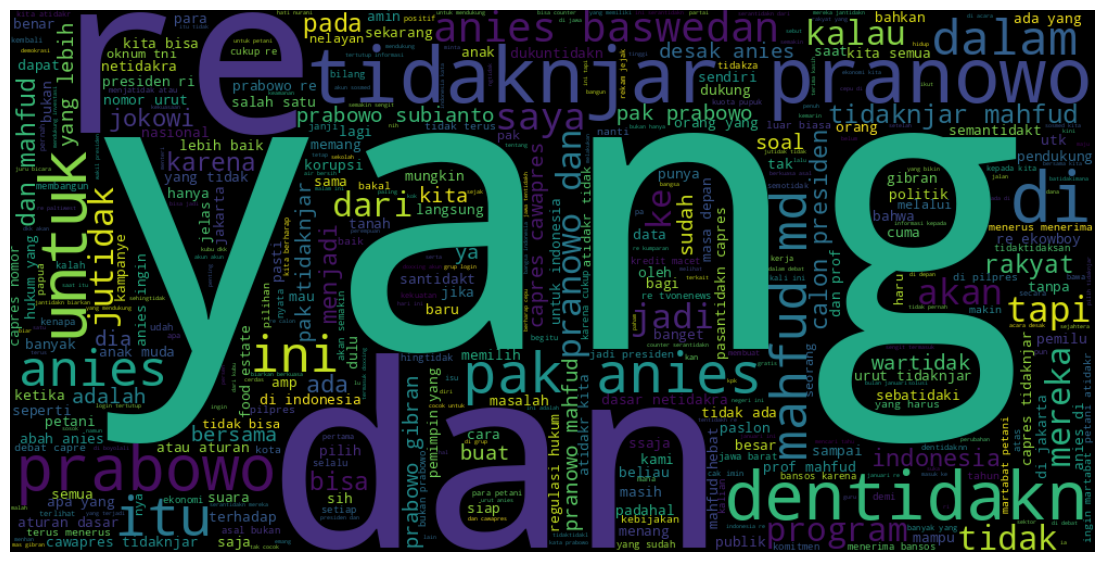

In [ ]:
df = ' '.join(balanced_data['normalize'].tolist())

stopwords = set(STOPWORDS)

wc = WordCloud(stopwords=stopwords, background_color='black',
               max_words=400, width=1000, height=500)
wc.generate(df)

plt.figure(figsize=(14,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
stop_words = stopwords.words('indonesian')
custom_stopwords = ['tidak', 'ya', 'sih', 'prabowo', 'anies', 'ganjar',
                    'jokowi', 'anis', 'gibran', 'mahfud', 'md', 'amin',
                    'baswedan', 'pranowo', 'subianto', 'paslon',
                    'capres', 'cawapres', 'abah', 'pak' ]

stop_words.extend(custom_stopwords)

In [ ]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

data['clean_text'] = data['tokenize'].apply(lambda x: remove_stopwords(x))
data.head()

,text,label,cleasing,case_folding,normalize,tokenize,clean_text
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,Kunjungan Prabowo ini untuk dan proyek bantuan...,kunjungan prabowo ini untuk dan proyek bantuan...,kunjungan prabowo ini untuk dan proyek bantuan...,"[kunjungan, prabowo, ini, untuk, dan, proyek, ...","[kunjungan, proyek, bantuan, air, bersih, titik]"
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik,Anies dapat tepuk tangan meriah saat jadi Rekt...,anies dapat tepuk tangan meriah saat jadi rekt...,anies dapat tepuk tangan meriah saat jadi rekt...,"[anies, dapat, tepuk, tangan, meriah, saat, ja...","[tepuk, tangan, meriah, rektor, mata, kuliah, ..."
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi,emng bener sih pendukung ada yg goblok begitu...,emng bener sih pendukung ada yg goblok begitu...,memang benar sih pendukung ada yang goblok be...,"[memang, benar, sih, pendukung, ada, yang, gob...","[pendukung, goblok, pendukung, hanyaa, sj, rid..."
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik,Sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,"[sewaktu, anies, bersikap, kritis, ke, kinerja...","[bersikap, kritis, kinerja, dianggap, engga, s..."
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik,Anies Baswedan Harap ASN termasuk TNI dan Polr...,anies baswedan harap asn termasuk tni dan polr...,anies baswedan harap asn termasuk tni dan polr...,"[anies, baswedan, harap, asn, termasuk, tni, d...","[harap, asn, tni, polri, pegang, sumpahanyaa, ..."


In [ ]:
balanced_data.to_excel("/content/drive/MyDrive/balance_data_clean.xlsx")

In [ ]:
# @title
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

data['filtering/stopword_removal'] = data['tokenize'].apply(lambda x: remove_stopwords(x))
data.head()

,text,label,cleasing,case_folding,normalize,tokenize,filtering/stopword_removal
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,Kunjungan Prabowo ini untuk dan proyek bantuan...,kunjungan prabowo ini untuk dan proyek bantuan...,kunjungan prabowo ini untuk dan proyek bantuan...,"[kunjungan, prabowo, ini, untuk, dan, proyek, ...","[kunjungan, prabowo, proyek, bantuan, air, ber..."
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik,Anies dapat tepuk tangan meriah saat jadi Rekt...,anies dapat tepuk tangan meriah saat jadi rekt...,anies dapat tepuk tangan meriah saat jadi rekt...,"[anies, dapat, tepuk, tangan, meriah, saat, ja...","[anies, tepuk, tangan, meriah, rektor, mata, k..."
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi,emng bener sih pendukung 01 ada yg goblok begi...,emng bener sih pendukung 01 ada yg goblok begi...,emng benar sih pendukung 01 ada yang goblok be...,"[emng, benar, sih, pendukung, 01, ada, yang, g...","[emng, pendukung, 01, goblok, pendukung, 02, h..."
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik,Sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,"[sewaktu, anies, bersikap, kritis, ke, kinerja...","[anies, bersikap, kritis, kinerja, prabowo, di..."
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik,Anies Baswedan Harap ASN termasuk TNI dan Polr...,anies baswedan harap asn termasuk tni dan polr...,anies baswedan harap asn termasuk tni dan polr...,"[anies, baswedan, harap, asn, termasuk, tni, d...","[anies, baswedan, harap, asn, tni, polri, pega..."


## 6. STEMMING

In [ ]:
! pip install Sastrawi

In [ ]:
# @title
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [ ]:
# @title
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
  return [stemmer.stem(word) for word in text]

balanced_data['stemming_data'] = balanced_data['clean_text'].apply(lambda x: ' '.join(stem_text(x)))
balanced_data.head()

,text,label,cleasing,case_folding,normalize,tokenize,clean_text,stemming_data
0,"RT Momen capres nomor urut 3, Ganjar Pranowo b...",Pertahanan dan Keamanan,Momen capres nomor urut Ganjar Pranowo besuk ...,momen capres nomor urut ganjar pranowo besuk ...,momen capres nomor urut tidaknjar pranowo bes...,"[momen, capres, nomor, urut, tidaknjar, pranow...","[momen, capres, nomor, urut, besuk, korban, ok...",momen capres nomor urut besuk korban oknum tni...
1,RT @0SIRtH1oGVbK2EuKBmDu8IZTnnsgBYm4kuRvLEJJ8l...,Politik,Sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,"[sewaktu, anies, bersikap, kritis, ke, kinerja...","[bersikap, kritis, kinerja, dianggap, engga, s...",sikap kritis kerja anggap engga sopan anggap o...
2,RT Ketua Tim Pemenangan Nasional (TPN) Ganjar-...,Politik,Ketua Tim Nasional TPN Arsjad Rasjid pasangan ...,ketua tim nasional tpn arsjad rasjid pasangan ...,ketua tim nasional tapin arsjad rasjid pasanti...,"[ketua, tim, nasional, tapin, arsjad, rasjid, ...","[ketua, tim, nasional, tapin, arsjad, rasjid, ...",ketua tim nasional tapin arsjad rasjid pasang ...
3,@ZwnzF6XMCyLTZ64JXZzj/srEG7ZM2GvFH9RnAgMUCLM= ...,Politik,Salah satu kerja nyata Prabowo,salah satu kerja nyata prabowo,salah satu kerja nyata prabowo,"[salah, satu, kerja, nyata, prabowo]","[salah, kerja, nyata]",salah kerja nyata
4,"RT ""Prabowo Gibran bisa dikalahkan. Saya tidak...",Sosial Budaya,Prabowo Gibran bisa Saya tidak punya agenda AM...,prabowo gibran bisa saya tidak punya agenda am...,prabowo gibran bisa saya tidak punya agenda am...,"[prabowo, gibran, bisa, saya, tidak, punya, ag...","[agenda, agenda, gafud, agenda, joko, widodo, ...",agenda agenda gafud agenda joko widodo eep re


In [ ]:
balanced_data.to_excel("/content/drive/MyDrive/balance_data_fixclean.xlsx")

# TRAINING

In [ ]:
pip install jcopml

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.0 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.7-py2.py3-none-any.whl size=45916 sha256=beafae27b0e7537191ecab0966e01022f1a1fd2f2f50a266bcb179ca4e6fdc30
  Stored in directory: /root/.cache/pip/wheels/1b/f0/69/8cd4944dd9637953ab744056b5faa32617cd4de449b213e886
Successfully built jcopml


In [ ]:
import os
import pickle
from dataclasses import dataclass
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X = balanced_data['stemming_data']
y = balanced_data['label']

In [ ]:
label_dict = {
    'Politik': 0,
    'Sosial Budaya': 1,
    'Pertahanan dan Keamanan': 2,
    'Ideologi': 3,
    'Ekonomi': 4,
    'Sumber Daya Alam': 5,
    'Demografi': 6,
    'Geografi': 7
}

y = y.map(label_dict)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2782,), (696,), (2782,), (696,))

In [ ]:
vectorizer = TfidfVectorizer(tokenizer=word_tokenize)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X_train_tfidf

<2782x6137 sparse matrix of type '<class 'numpy.float64'>'
	with 36753 stored elements in Compressed Sparse Row format>

In [ ]:
# @title
pipeline = Pipeline([
    ('prep', TfidfVectorizer(tokenizer=word_tokenize)),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.logreg_params, cv=3, n_iter=50,
                           n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_val, y_val))

NameError: name 'Pipeline' is not defined

In [ ]:
# @title
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
# @title
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, stop_words, norm_dict):
        self.stop_words = stop_words
        self.norm_dict = norm_dict

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_clean = X.apply(clean_twitter_text)
        X_folded = X_clean.apply(case_folding)
        X_normalized = X_folded.apply(lambda x: normalization(x))
        X_tokenized = X_normalized.apply(lambda x: x.split())
        X_filtered = X_tokenized.apply(lambda x: ' '.join([word for word in x if word not in self.stop_words]))
        return X_filtered

# Initialization of custom components
indonesian_stop_words = stopwords.words('indonesian')
custom_stopwords = ['tidak', 'ya', 'sih']
indonesian_stop_words.extend(custom_stopwords)

norm_dict = {"yg": "yang",
        "gak": "tidak",
        "krn": "karena",
        "krna": "karena",
        "dg": "dengan",
        "dgn": "dengan",
        "gw": "saya",
        "gua": "saya",
        "gue": "saya",
        "sy": "saya",
        "nyerang": 'serang',
        "thdp": "terhadap",
        "udh": "sudah",
        "sdh": "sudah",
        "jd": "jadi",
        "msh": "masih",
        "sdg": "sedang",
        "tp": "tapi",
        "jg": "juga",
        "hny": "hanya",
        "thn": "tahun",
        "dpt": "dapat",
        "jgn": "jangan",
        "scr": "secara",
        "brantem": "berkelahi",
        "cb": "coba",
        "aja": "saja",
        "klo": "kalau",
        "klau": "kalau",
        "kalo": "kalau",
        "lakuin": "lakukan",
        "org": "orang",
        "nggak": "tidak",
        "klar": "kelar",
        "bener": "benar",
        "dlm": "dalam",
        }

# Create an instance of the custom TextPreprocessor
text_preprocessor = TextPreprocessor(stop_words=indonesian_stop_words, norm_dict=norm_dict)


In [ ]:
# @title
pipeline = Pipeline([
    ('prep', TextPreprocessor(stop_words=indonesian_stop_words, norm_dict=norm_dict)),
    ('tfidf', TfidfVectorizer(tokenizer=word_tokenize)),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.logreg_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

# Evaluation
print(model.best_params_)
print("Training score:", model.score(X_train, y_train), "Validation score:", model.score(X_val, y_val))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'algo__C': 9.443515687962691, 'algo__fit_intercept': False}
Training score: 0.97775 Validation score: 0.76


In [ ]:
@dataclass
class ModelTrainerConfig:
    trained_model_file_path: str = os.path.join("artifacts", "models")

In [ ]:
models = {
    'logistic_regression': LogisticRegression(),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'xgboost': XGBClassifier(),
    'svm': SVC()
}

param_grids = {
    'logistic_regression': {'penalty': ['l1', 'l2'],
                            'solver': ['lbfgs', 'liblinear']},
    'decision_tree': {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]},
    'random_forest': {'n_estimators': [100, 200, 500], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]},
    'xgboost': {'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 10], 'n_estimators': [100, 200, 500]},
    'svm': {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
}


In [ ]:
class ModelTrainer:
    def __init__(self):
        self.config = ModelTrainerConfig()

    def train_model(self, model, model_name, param_grid, X_train, y_train, X_test, y_test):
        print(f"Training {model_name}")
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        print(f"Best {model_name} model: {best_model}")
        print(f"Best {model_name} parameters: {best_params}")
        print(f"Best {model_name} score: {best_score}")

        y_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred)
        print(f"{model_name} test accuracy: {test_accuracy}")

        return best_model, best_params, best_score, test_accuracy

    def initiate_model_training(self, X_train, y_train, X_test, y_test):
        model_results = {}
        for model_name, model in models.items():
            param_grid = param_grids.get(model_name, {})
            best_model, best_params, best_score, test_accuracy = self.train_model(
                model, model_name, param_grid, X_train, y_train, X_test, y_test
            )
            model_results[model_name] = {
                'best_model': best_model,
                'best_params': best_params,
                'best_score': best_score,
                'test_accuracy': test_accuracy
            }
        return model_results

In [ ]:
trainer = ModelTrainer()
results = trainer.initiate_model_training(X_train_tfidf, y_train, X_val_tfidf, y_val)

Training logistic_regression


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver 

Best logistic_regression model: LogisticRegression()
Best logistic_regression parameters: {'penalty': 'l2', 'solver': 'lbfgs'}
Best logistic_regression score: 0.6466521576275783
logistic_regression test accuracy: 0.6609195402298851
Training decision_tree
Best decision_tree model: DecisionTreeClassifier(min_samples_split=5)
Best decision_tree parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}
Best decision_tree score: 0.6193450266716609
decision_tree test accuracy: 0.6149425287356322
Training random_forest
Best random_forest model: RandomForestClassifier(min_samples_split=5, n_estimators=500)
Best random_forest parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 500}
Best random_forest score: 0.6955368559730313
random_forest test accuracy: 0.6896551724137931
Training xgboost
Best xgboost model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
      

# Testing

In [ ]:
# @title
data_test = pd.read_excel("/content/drive/MyDrive/dataset_unlabeled_penyisihan_bdc_2024.xlsx")

In [ ]:
data_test.head()

,IDText,Text
0,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...
1,TXT0002,Prabowo ditanya soal hutang luar negeri dia me...
2,TXT0003,kiki_daliyo Ganjar Pranowo itulah beliau soso...
3,TXT0004,@kumparan Prabowo Gibran yang bisa melakukan i...
4,TXT0005,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...


In [ ]:
test = data_test['Text']

In [ ]:
predicted_labels = model.predict(test)

In [ ]:
reverse_label_dict = {v: k for k, v in label_dict.items()}

predicted_labels_categorical = [reverse_label_dict[label] for label in predicted_labels]

result_df = data_test.copy()
result_df['Predicted_Label'] = predicted_labels_categorical

In [ ]:
result_df

,IDText,Text,Predicted_Label
0,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...,Politik
1,TXT0002,Prabowo ditanya soal hutang luar negeri dia me...,Politik
2,TXT0003,kiki_daliyo Ganjar Pranowo itulah beliau soso...,Politik
3,TXT0004,@kumparan Prabowo Gibran yang bisa melakukan i...,Politik
4,TXT0005,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...,Politik
...,...,...,...
995,TXT0996,"Bikin bangga deh, Ganjar-Mahfud mau alokasikan...",Politik
996,TXT0997,Pak Jokowi sebelum pilpres 2024 berbesar hati ...,Politik
997,TXT0998,@datuakrajoangek Sbaiknya si gemot nga usah ik...,Politik
998,TXT0999,kebiasaan merembuk atau bermusyawarah jadi gay...,Ekonomi
